In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

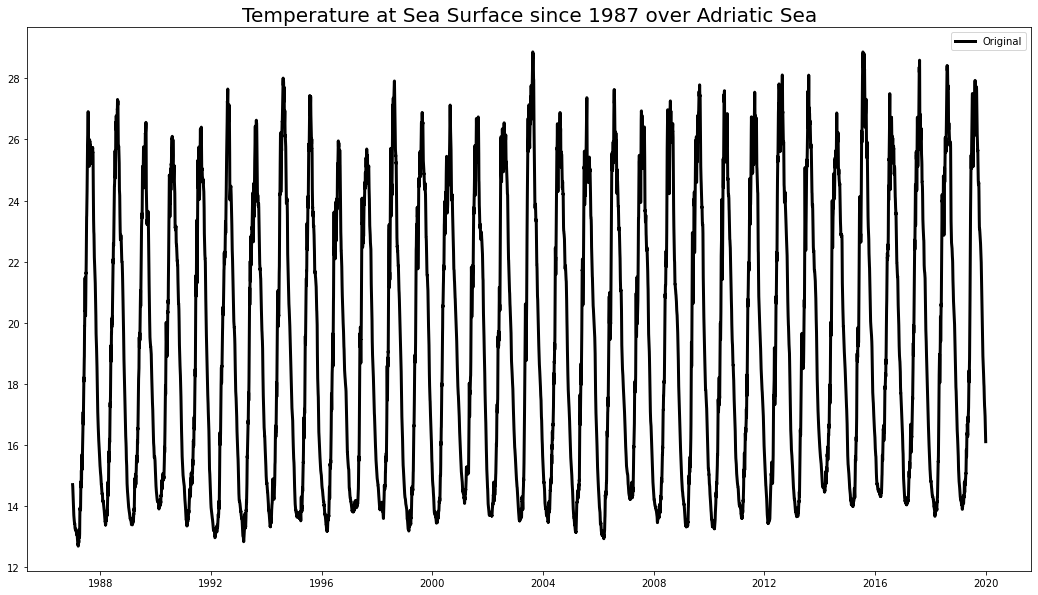

In [2]:
rcParams['figure.figsize'] = 18, 10
rcParams['lines.linewidth'] = 3

df = pd.read_csv('TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.csv', index_col='DATE', parse_dates=['DATE'])

plt.title('Temperature at Sea Surface since 1987 over Adriatic Sea', size=20)

plt.plot(df, color='k', label='Original')

plt.legend();

In [3]:
#df['year'] 
#df['month'] 

In [4]:
df

,TEMPERATURE
DATE,
1987-01-01 12:00:00,14.696689
1987-01-02 12:00:00,14.670896
1987-01-03 12:00:00,14.636758
1987-01-04 12:00:00,14.561996
1987-01-05 12:00:00,14.448793
...,...
2019-12-27 12:00:00,16.640701
2019-12-28 12:00:00,16.531431
2019-12-29 12:00:00,16.363058


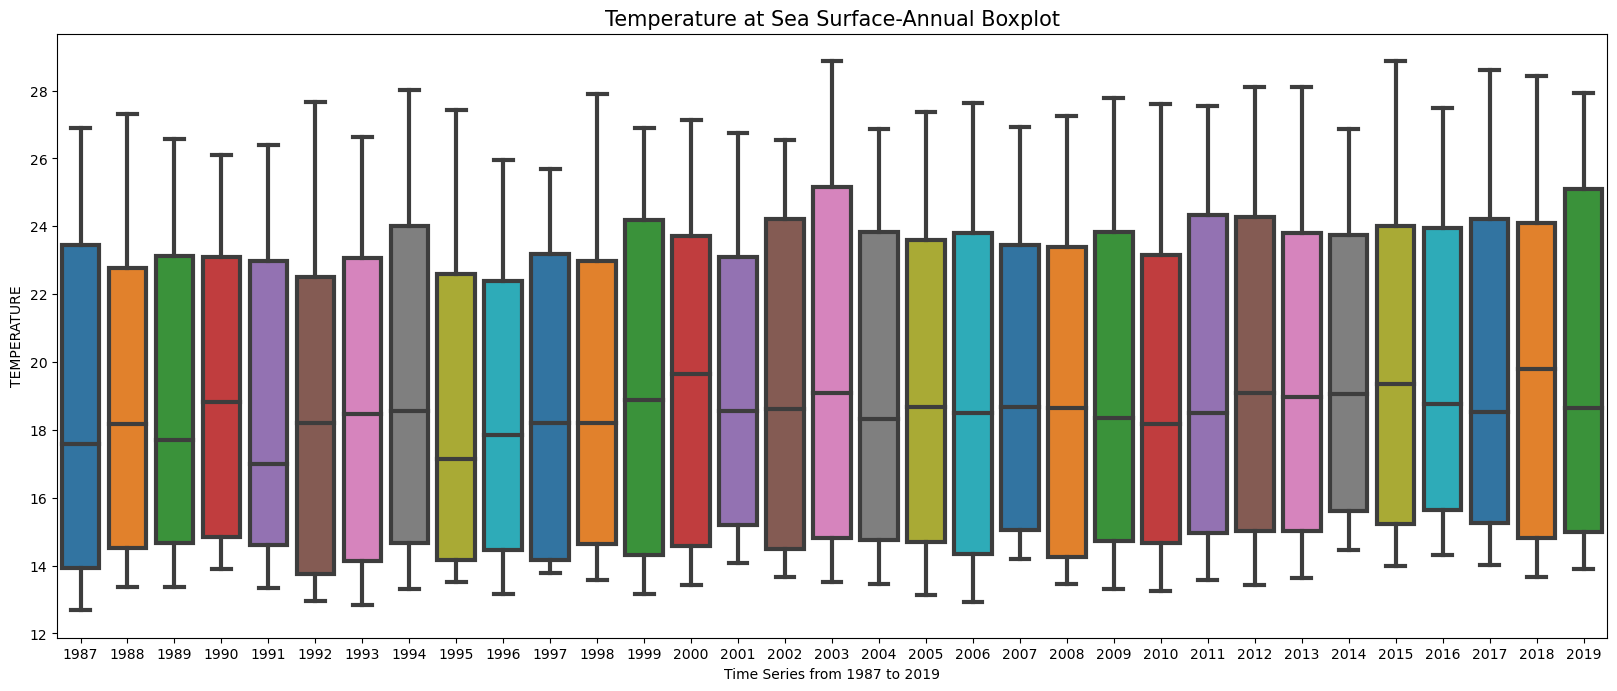

In [5]:
df = pd.read_csv('TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.csv', parse_dates=['DATE'])
df.reset_index(inplace=True)

df['Time Series from 1987 to 2019'] = [d.year for d in df.DATE]
df['month'] = [d.strftime('%b') for d in df.DATE]
years = df['Time Series from 1987 to 2019'].unique()

fig, axes = plt.subplots(1, figsize=(20,8), dpi= 100)
sns.boxplot(x='Time Series from 1987 to 2019', y='TEMPERATURE', data=df, palette="tab10")

axes.set_title('Temperature at Sea Surface-Annual Boxplot', fontsize=15); 
#plt.savefig('Temperatureat Sea Surface-Annual Boxplot.png')
plt.show()
plt.close()

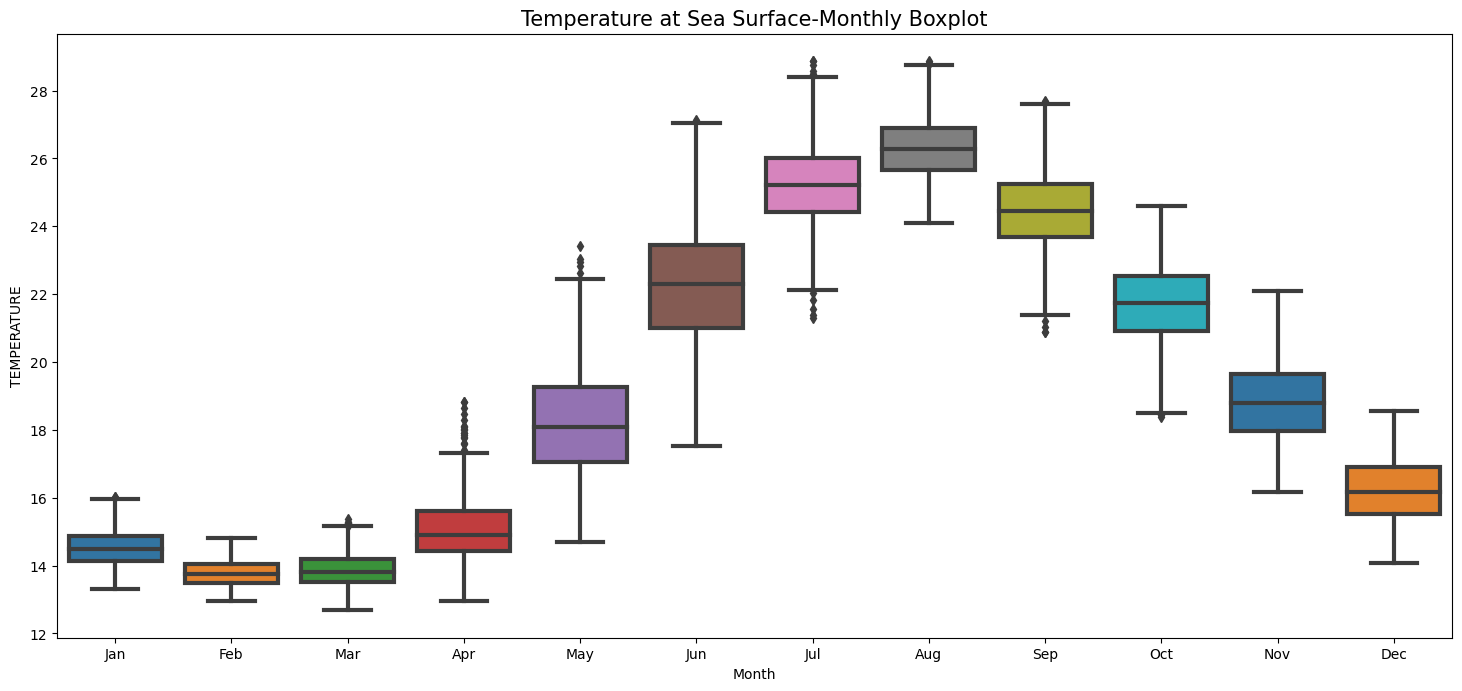

In [6]:
df['Time Series from 1987 to 2019'] = [d.year for d in df.DATE]
df['Month'] = [d.strftime('%b') for d in df.DATE]
years = df['Time Series from 1987 to 2019'].unique()

fig, axes = plt.subplots(1, figsize=(18,8), dpi= 100)
sns.boxplot(x='Month', y='TEMPERATURE', data=df.loc[~df.month.isin([1987, 2019]), :], palette="tab10")

axes.set_title('Temperature at Sea Surface-Monthly Boxplot', fontsize=15); 
#plt.savefig('Temperature at Sea Surface-Monthly Boxplot.png')
plt.show()
plt.close()

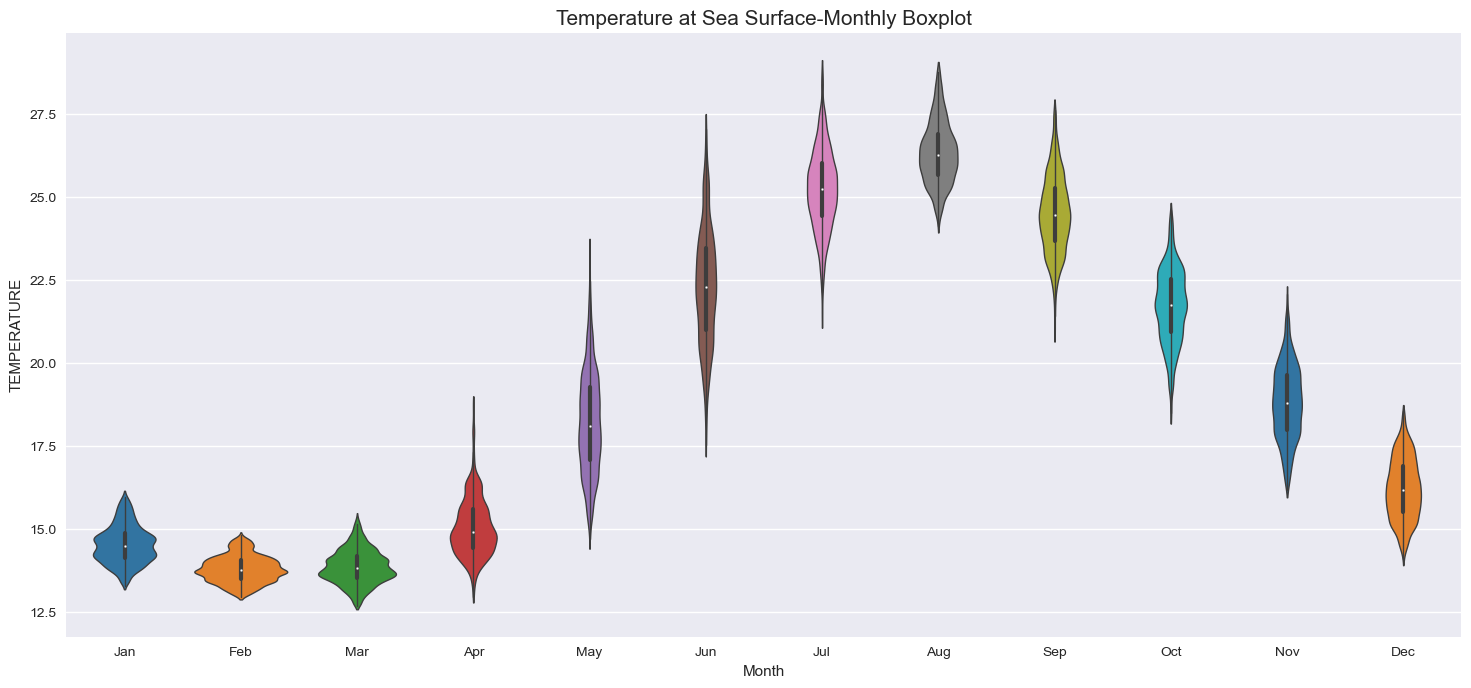

In [9]:
plt.style.use('seaborn')

df['Time Series from 1987 to 2019'] = [d.year for d in df.DATE]
df['Month'] = [d.strftime('%b') for d in df.DATE]
years = df['Time Series from 1987 to 2019'].unique()

fig, axes = plt.subplots(1, figsize=(18,8), dpi= 100)
#sns.boxplot(x='Month', y='TEMPERATURE', data=df.loc[~df.month.isin([1987, 2019]), :], palette="tab10")
sns.violinplot(x='Month', y='TEMPERATURE', data=df.loc[~df.month.isin([1987, 2019]), :], palette="tab10", bw=.2, cut=1, linewidth=1)

axes.set_title('Temperature at Sea Surface-Monthly Boxplot', fontsize=15); 
#plt.savefig('Temperature at Sea Surface-Monthly Boxplot.png')
plt.show()
plt.close()

<AxesSubplot:xlabel='Month', ylabel='TEMPERATURE'>

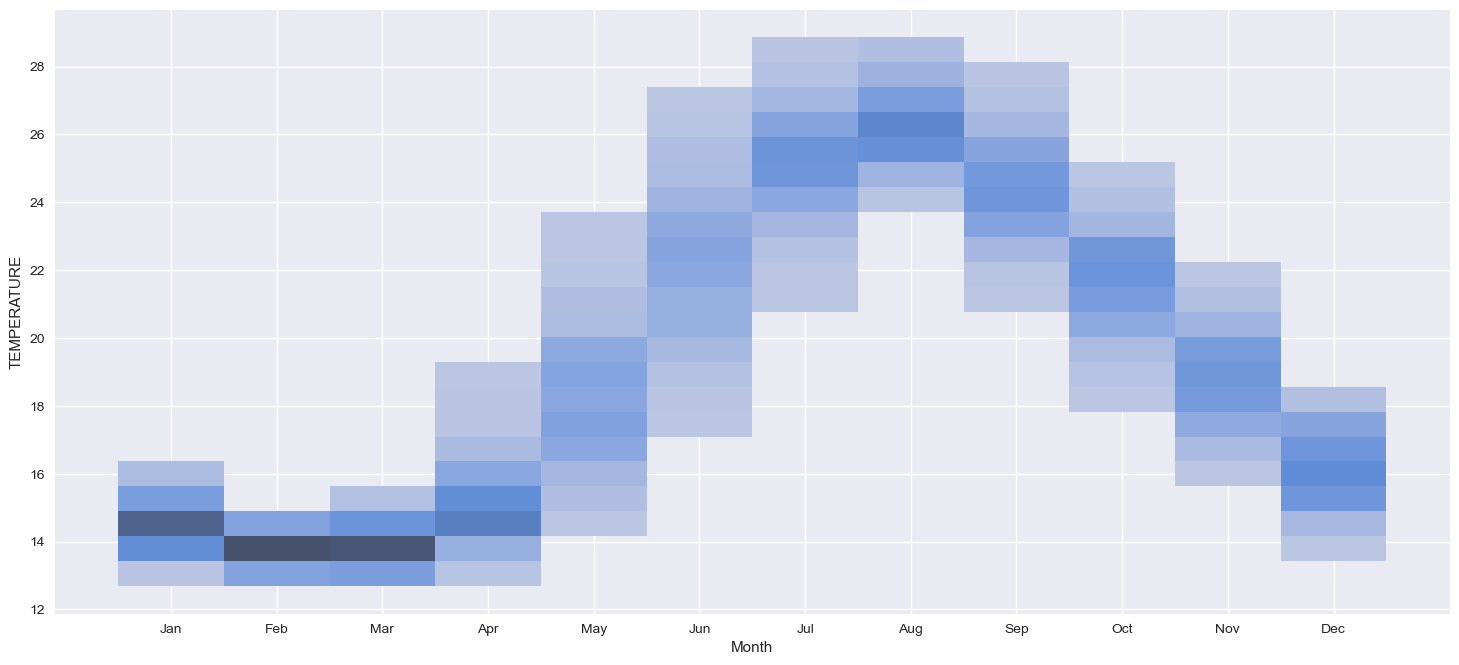

In [8]:
plt.style.use('seaborn')

df['Time Series from 1987 to 2019'] = [d.year for d in df.DATE]
df['Month'] = [d.strftime('%b') for d in df.DATE]
years = df['Time Series from 1987 to 2019'].unique()

fig, axes = plt.subplots(1, figsize=(18,8), dpi= 100)
sns.histplot(
    x='Month', y='TEMPERATURE', data=df.loc[~df.month.isin([1987, 2019]), :],
    multiple="stack",
    palette="tab10",
)

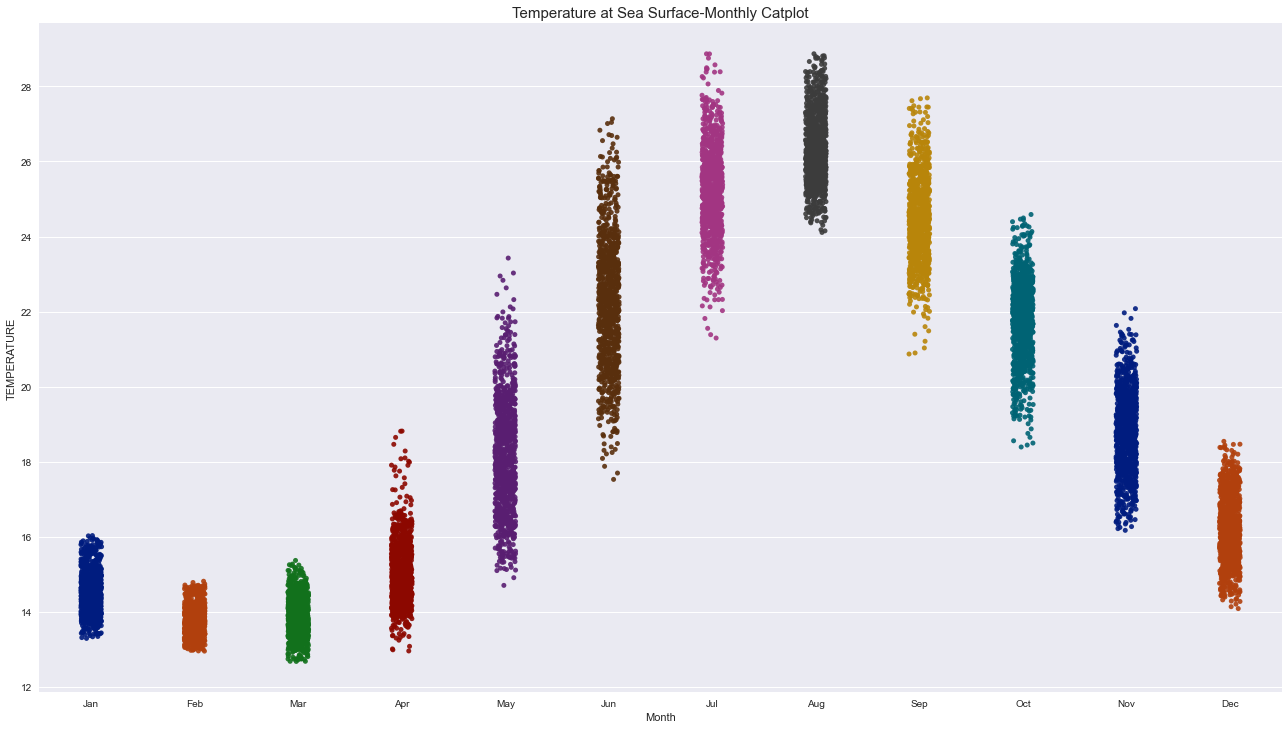

In [16]:
plt.style.use('seaborn')

df['Time Series from 1987 to 2019'] = [d.year for d in df.DATE]
df['Month'] = [d.strftime('%b') for d in df.DATE]
years = df['Time Series from 1987 to 2019'].unique()


sns.catplot(
    x='Month', y='TEMPERATURE', data=df.loc[~df.month.isin([1987, 2019]), :],
    ci="sd", palette="dark",alpha=.9, height=10,aspect=18/10
)
#axes.set_title('Temperature at Sea Surface-Monthly Catplot', fontsize=15); 
plt.title('Temperature at Sea Surface-Monthly Catplot', size=15)
plt.savefig('Temperature at Sea Surface-Monthly catplot.png')
